### Problem Statement

#### **Unilever Data Science POC Use Case**

One of our brands is going through some major changes in business execution plans and will like to know.

i. What are the major drivers for sales(EQ)?

ii. Knowing the drivers, how accurately we can predict future sales for next 6 periods?


#### Packages

In [177]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Using plotly for data visualissation
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
py.init_notebook_mode(connected=True)

import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization

### Data Description

        KPI                       Definition
        SHOPPER.MARKETING.CP      consumer promotion
        SOS_pct                   share of spends percentage
        TV_SOV_Pct                Share of voice percentage
        CCFOT                     customer quantity filled on time
        Median.Temp               Temperature
        Trip.Conversion           avg trip converted for an item
        Total.Units.PerItemTrip   total items per converted trips
        Plan.Invest               Trade promotion
        Avg.EQ.Price              Price associated to target (EQ)
        EQ                        Target volume – Dependent variable
        Est.ACV.Selling           estimated volume of the market
        pct.ACV                   % all commodity volume
        Avg.of.Items              distribution metric (# o fitems on shelf)
        pct.promo.Market.Dollars  % of dollar on promotion in a category
        Mag.Impressions_pct       Magazine impression
        competitor1-RPI           Competitor regular price
        EQ_master                 Category total cat volume
        EQ_subcategory            total subcategory volume
    pct_PromoMarketDollars_subcat % of dollar on promotion in a subcategory

In [178]:
train_df = pd.read_csv("/kaggle/input/data-science-poc/Training-Data-Sets - NEWDATA.csv")
train_df.head()

,s.no,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,718.458667,22256928,56812,7724107,238700,151438,1044,112229070,2133614,5,11,62,55,0.49298,8.069,0.067591,7708,42.77,43.09,13.663,5.25,1.580,1.679,446172630,20.58,2.8135,0.19960,36.223,54.17,16.46,105.71,36.13,46.36,71.83,5420048,475559,0.3766,45.77
1,2,25.521137,4239408,105695,5844288,188902,264008,113582,284597324,1719318,38,14,59,61,0.07811,9.328,0.046174,6693,42.84,44.26,9.632,1.87,0.806,1.654,856199835,26.53,2.3588,0.29390,43.028,65.79,15.64,111.79,43.31,47.58,67.90,12155631,371540,0.2515,35.02
2,3,268.288044,6708500,87686,13008485,19704,150505,38501,807781054,1569740,9,33,51,33,0.94863,9.553,0.026979,2699,42.95,48.33,14.728,5.64,3.026,1.620,503553502,14.92,2.8399,0.31483,42.031,45.08,23.91,110.15,38.26,49.26,72.70,11939870,225984,0.3679,46.22
3,4,209.071599,36835247,70791,2520814,200111,253458,53719,667441334,922723,9,43,56,51,0.70916,7.838,0.106558,4898,43.53,59.10,0.465,2.86,1.006,1.620,463383476,28.92,2.7889,0.07673,41.377,75.24,13.06,116.74,39.37,44.21,73.01,7045541,551342,0.0504,38.10
4,5,3482.169185,23693467,75610,9276779,65532,278877,95178,74045467,1834970,26,22,48,54,0.96547,8.085,0.129135,8678,43.83,48.50,9.217,4.28,3.681,1.434,692252839,36.12,2.8071,0.36388,38.153,56.85,40.72,115.18,36.85,45.46,75.84,11488805,254143,0.2219,39.16


In [179]:
test_df  = pd.read_excel("/kaggle/input/skillenxadspoc/Test dataset v1.xlsx")
test_df.head()

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,2019283.0,5493.0,37148.2,2045.282,0.000012,0.000012,1.203045e+09,2220633.0,7.446883,16.0,100.0,32.950,0.5150,8.226,0.013258,42744.256840,42.410000,49.091447,9.691794,2.87,1.688896,1.427532,8696587915,39.441025,2.611782,0.0339,35.817030,27.702433,21.300,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,4564738.0,12938.0,50886.8,2370.584,0.000014,0.000015,1.944356e+09,469895.0,11.677082,5.0,87.5,34.625,0.2700,7.473,0.009938,36290.439557,42.410000,49.057612,9.415938,2.87,1.687952,1.442716,8682307085,38.417224,2.522814,0.0391,36.389065,21.432628,12.334,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,1029384.0,6546.0,253333.2,3180.888,0.000016,0.000017,9.984054e+08,4465061.0,0.102858,46.0,96.0,46.700,0.3900,8.001,0.007832,34852.141656,42.410000,49.367514,5.176684,2.87,1.834440,1.423408,8706897549,36.499442,2.477322,0.0228,36.599984,29.726275,23.213,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,902938.0,3928.0,3426239.0,13595.398,0.000016,0.000019,3.039816e+09,1031855.0,0.249055,48.0,100.0,49.650,0.3500,8.767,0.010034,24869.558988,43.543571,50.657634,6.088273,2.87,2.444000,1.443401,8660288592,38.135159,2.520409,0.0147,38.201852,30.326275,14.456,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,1343454.0,28374.0,552197.8,3983.134,0.000016,0.000019,9.622004e+08,2842722.0,13.338804,19.0,100.0,58.100,0.5025,9.277,0.009546,61675.321620,43.790000,50.625777,7.827112,1.87,0.170731,1.473687,8644518558,38.629564,2.497285,0.0219,38.648805,31.702433,25.300,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [180]:
test_df.describe()

,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
count,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,39.000000,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000
mean,317.607462,9.146515e+06,58717.585474,3.631546e+06,51570.720453,2.021186e+06,34144.450052,1.812724e+09,2.636554e+06,11.439476,25.267084,87.957889,55.785897,0.392372,10.193513,0.017954,13698.099744,43.343031,52.152324,7.083804,3.388814,1.763140,1.535196,5.857398e+09,25.383663,2.441023,0.023945,38.444523,34.769345,25.678900,102.200774,38.646238,44.691582,65.408013,2.111044e+06,494376.637197,0.108772,42.356404
std,117.566092,9.651932e+06,79818.995410,4.162175e+06,43442.272642,3.677723e+06,62196.424335,1.415378e+09,1.877501e+06,11.340795,22.689996,18.673922,15.656995,0.167040,1.156767,0.005566,19137.707939,0.773743,3.840841,3.669264,1.525845,1.718690,0.094601,2.067917e+09,9.357308,0.107770,0.019449,2.686686,21.887500,11.669623,8.788492,4.933611,3.261620,4.768028,4.099681e+05,198096.696379,0.109919,3.060174
min,130.937361,2.160000e+04,2006.674000,2.989220e+04,1800.344000,1.230000e-05,0.000012,2.880720e+04,3.505506e+02,0.102858,0.003853,20.000000,29.950000,0.095000,7.473000,0.007832,365.430000,42.140000,44.782569,0.328645,1.633989,0.033276,1.423408,2.904612e+09,13.036065,2.075661,0.000238,32.483718,7.080951,10.200000,83.883480,32.368993,38.550768,57.583497,1.504339e+06,249237.493500,0.001659,35.480731
25%,238.472603,1.731686e+06,11438.085001,1.106505e+05,12755.265326,1.666544e-05,0.000020,4.189834e+08,1.179309e+06,0.989926,1.121202,81.951531,42.250000,0.277500,9.452000,0.014475,772.145000,42.663214,49.585045,5.618422,1.870000,0.601303,1.454777,3.996030e+09,14.475919,2.378440,0.006630,36.515377,17.015758,14.899000,97.092027,35.718011,41.881951,62.430457,1.774046e+06,333269.460000,0.027591,40.485839
50%,286.705586,4.564738e+06,34039.140505,1.909387e+06,39282.000000,2.374541e+03,404.646896,1.717025e+09,2.522631e+06,9.209103,23.000000,100.000000,57.250000,0.395000,10.030000,0.018697,1168.950000,43.543571,51.268984,7.759102,2.870000,1.207121,1.493424,5.525007e+09,24.556337,2.439410,0.022800,38.322539,31.702433,24.345000,100.734978,37.377758,44.631443,65.324834,2.010362e+06,421134.368800,0.078074,42.776921
75%,388.932161,1.530694e+07,81838.572846,5.977302e+06,76428.000000,1.689334e+06,37296.393200,3.119164e+09,3.787462e+06,17.300709,45.650000,100.000000,71.075000,0.530000,10.938000,0.021872,28613.270207,43.992857,54.223745,8.721886,5.145524,2.210607,1.602515,7.690943e+09,32.504704,2.498816,0.033550,39.624823,41.614122,35.200000,106.348210,40.034473,45.924004,67.668061,2.422064e+06,637651.872200,0.143282,44.000818
max,546.053084,4.039739e+07,473832.000000,1.830051e+07,170507.762784,1.205852e+07,239751.406689,4.438204e+09,8.617309e+06,47.442188,88.182705,100.000000,77.350000,0.740000,12.286000,0.026884,61675.321620,44.450000,60.677869,16.538448,5.844973,7.925424,1.730202,8.706898e+09,39.441025,2.664421,0.070100,44.150672,100.000000,47.700000,121.889647,57.797794,53.149560,76.896817,2.867307e+06,856242.939400,0.430051,49.735737


In [181]:
print("Shape of Train and Test Data:",train_df.shape,test_df.shape)

Shape of Train and Test Data: (12000, 39) (39, 39)


## Exploratory Data Analysis

#### Time Period vs EQ (Target  volume)

In [182]:
fig = px.line(test_df, x='Period', y='EQ')
fig.show()

#### Observation:

From this plot, We can observe that: 
                * Data is over a period of **three years from 2016 to 2018**
                * Each is year is divided into **13 periods**.
                * The data given is following a **downward trend** with the target variable.
                
Let's dive a little bit deeper to understand whether there is any seasonal pattern over the years.
      

In [183]:
df_2016 =test_df[test_df.Period.str.startswith('2016')] 
df_2017 =test_df[test_df.Period.str.startswith('2017')] 
df_2018 =test_df[test_df.Period.str.startswith('2018')] 

df_2016.Period  = df_2016.Period.map(lambda x: x.split('-')[1])
df_2017.Period  = df_2017.Period.map(lambda x: x.split('-')[1])
df_2018.Period  = df_2018.Period.map(lambda x: x.split('-')[1])

df_2016.EQ  = df_2016.EQ.map(lambda x: np.log(x))
df_2017.EQ  = df_2017.EQ.map(lambda x: np.log(x))
df_2018.EQ  = df_2018.EQ .map(lambda x: np.log(x))


fig = go.Figure()

fig.add_trace(go.Scatter(x=df_2016["Period"], y=df_2016['EQ'], name="EQ - 2016",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=df_2017["Period"], y=df_2017['EQ'], name="EQ - 2017",
                         line_color='dimgray'))

fig.add_trace(go.Scatter(x=df_2017["Period"], y=df_2018['EQ'], name="EQ - 2018",
                         line_color='red'))

fig.update_layout(title_text='Periodic Pattern of EQ over the years',
                  xaxis_rangeslider_visible=True)
fig.show()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Observation:**

In all these years, from **Period 8** Tends to decrease, following a downward steep.

To have better understanding of the data lets, form two new variables Year and period.

In [184]:
test_df["Year"] = test_df.Period.map(lambda x: x.split('-')[0])
test_df["Year_Period"] = test_df.Period.map(lambda x: x.split('-')[1])

In [185]:
print("The columns that are absent in train dataset")
for i in test_df.columns:
    if i not in train_df.columns:
        print(i)
        
print("The Columns that are not present in test dataset")
for i in train_df.columns:
    if i not in test_df.columns:
        print(i)

The columns that are absent in train dataset
Period
Year
Year_Period
The Columns that are not present in test dataset
s.no


### Observation:


The train data doesn't have the Period column, which is given in the test data.


With the observation on periods done above, let's try to find a pattern.

In [186]:
fig = px.line(train_df, x='s.no', y='EQ')
fig.show()

Okay, The train data here is very large so let's try whether there is same pattern for the first and last 13 serial no's as observed above.

In [187]:
temp_1 = train_df[:13]
temp_2 = train_df[len(train_df)-13:]

temp_2["s.no"]  =[i for i in range(1,14)]
temp_1.EQ  = temp_1.EQ.map(lambda x: np.log(x))
temp_2.EQ  = temp_2.EQ .map(lambda x: np.log(x))


fig = go.Figure()

fig.add_trace(go.Scatter(x=temp_1["s.no"], y=temp_1['EQ'], name="First 13",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=temp_2["s.no"], y=temp_2['EQ'], name="Last 13",
                         line_color='dimgray'))

fig.update_layout(title_text='Presence of period in the train data?',
                  xaxis_rangeslider_visible=True)
fig.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### From the graph above, the immitates the presence of period but it seems they have hidden(censored) it. So, with this finding let's start exploring the data.

## Question 1: What are the major drivers for sales(EQ)?

Let's start with the basic, let's try to figure out which variable is highly correleated with **EQ**

**Correlation** is usually defined as a measure of the linear relationship between two quantitative variables

* When the values of one variable increase as the values of the other increase, this is known as **positive correlation**.

* When the values of one variable decrease as the values of another increase to form an inverse relationship, this is known as **negative correlation**.

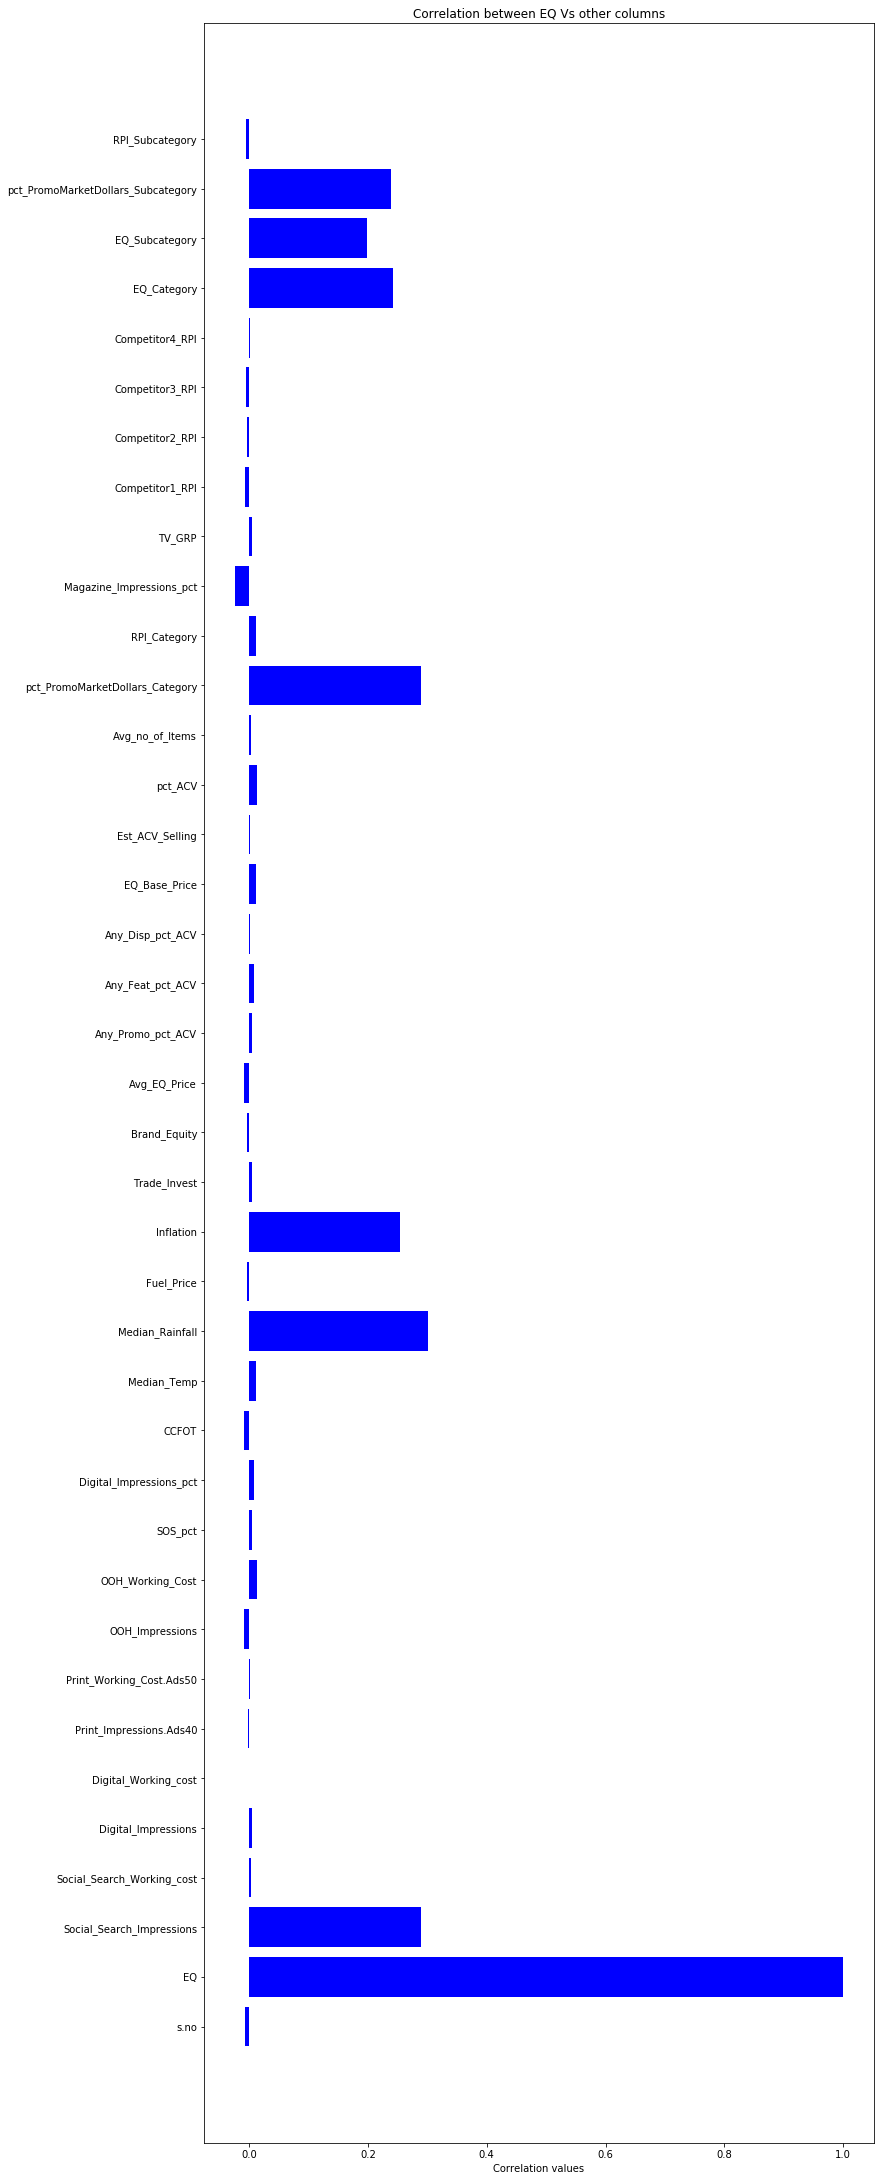

In [188]:
ind = np.arange(len(train_df.corr()["EQ"]))
width = 0.9
fig, ax = plt.subplots(figsize=(12,39))
rects = ax.barh(ind,train_df.corr()["EQ"], color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(train_df.corr()["EQ"].index, rotation='horizontal')
ax.set_xlabel("Correlation values")
ax.set_title("Correlation between EQ Vs other columns")
plt.show()

#### **Observation:**

From the correlation plot, we can see that
        * Social Search Impression
        * Inflation
        * Median Rainfall
        * EQ_Category
        * EQ_SubCategory
        *  % of dollar on promotion in a category
        *  % of dollar on promotion in a sub category
      These values have positive impact on the sales(EQ)

#### Major Drivers of EQ based on Feature Importance

In [189]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [190]:
columns = list(train_df.columns)
columns.remove("EQ")
y_train = train_df["EQ"]
X_train = train_df[columns]

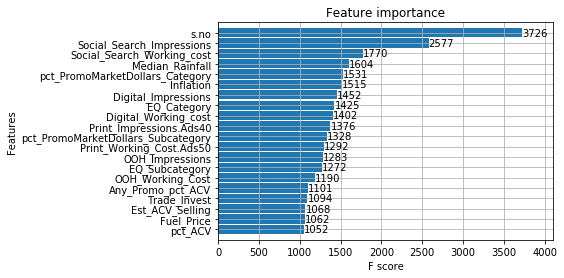

In [191]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, verbose=True)
plot = plot_importance(reg, height=0.9, max_num_features=20)

#### Top 5 important drivers are:

* Social search Impression
* Social Search Working Cost
* Median Rainfall
* Digital Impression
* Inflation

### Intersection between Correlation and XGBoost Feature Importance:

 * Social Search Impression
 * Median Rainfall
 * Inflation
 
 These are the major drivers of the Sales

## Knowing the drivers, how accurately we can predict future sales for next 6 periods?

### Modelling

In [192]:
#columns = list(train_df.columns)
#columns.remove("EQ")
#columns.remove('s.no')
columns = ["Social_Search_Impressions","Social_Search_Working_cost","Digital_Impressions","Inflation","Median_Rainfall","EQ_Category","pct_PromoMarketDollars_Category"]
#columns = ["Social_Search_Impressions","Inflation","Median_Rainfall"]
y_train = train_df["EQ"]
X_train = train_df[columns]
X_test = test_df[columns]
y_test = test_df["EQ"]

In [193]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### XGBoost Regressor

In [194]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints=None,
             n_estimators=2200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=7, reg_alpha=0.464,
             reg_lambda=0.8571, scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method=None, validate_parameters=False, verbosity=None)

In [195]:
prediction_xgb = model_xgb.predict(X_test)
print("MAPE value using XGBoost Regressor",mean_absolute_percentage_error(y_test, prediction_xgb))

MAPE value using XGBoost Regressor 85.91402563458925


### GBoosting Regressor

In [196]:
from sklearn.ensemble import GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='huber',
                          max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [197]:
prediction_gb = GBoost.predict(X_test)
print("MAPE value using Gradient Boost Regressor",mean_absolute_percentage_error(y_test, prediction_gb))

MAPE value using Gradient Boost Regressor 92.64914348450071


### Light GB Regression

In [198]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train,y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [199]:
prediction_lgb = model_lgb.predict(X_test)
print("MAPE value using Light Boost Regressor",mean_absolute_percentage_error(y_test, prediction_lgb))

MAPE value using Light Boost Regressor 252.4376029756621


### CAtBoost Regressor

In [200]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='MAPE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model.fit(X_train,y_train)

0:	learn: 19.3254273	total: 70.6ms	remaining: 49.3s
75:	learn: 6.5651813	total: 4.72s	remaining: 38.8s
150:	learn: 2.8605595	total: 9.32s	remaining: 33.9s
225:	learn: 1.6310238	total: 13.9s	remaining: 29.2s
300:	learn: 1.2422976	total: 18.5s	remaining: 24.5s
375:	learn: 1.1353589	total: 23.1s	remaining: 19.9s
450:	learn: 1.0841238	total: 27.7s	remaining: 15.3s
525:	learn: 1.0570822	total: 32.3s	remaining: 10.7s
600:	learn: 1.0418182	total: 36.9s	remaining: 6.08s
675:	learn: 1.0327348	total: 41.8s	remaining: 1.48s
699:	learn: 1.0273915	total: 43.3s	remaining: 0us


In [201]:
prediction_cb = cb_model.predict(X_test)
print("MAPE value using Cat Boost Regressor",mean_absolute_percentage_error(y_test, prediction_cb))

MAPE value using Cat Boost Regressor 91.96950924778551


### Ensemble learning

In [202]:
predictions_final = (0.30*prediction_cb+ 0.10*prediction_gb+0.60*prediction_xgb)
print("MAPE value using Ensemble Prediciton",mean_absolute_percentage_error(y_test, predictions_final))

MAPE value using Ensemble Prediciton 83.51483379616198


### By choosing the majority drivers and predicting the values the, optimal MAPE values arrived is  83.51483379616198

# Using the new data set

In [203]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/skillenxadspoc/Test dataset v1.xlsx
/kaggle/input/newtesttrain/TrainingData - Training.csv
/kaggle/input/newtesttrain/TestData - Test.csv
/kaggle/input/data-science-poc/Training-Data-Sets - NEWDATA.csv


In [204]:
columns = ["Social_Search_Impressions","Social_Search_Working_cost","Digital_Impressions","Inflation","Median_Rainfall","EQ_Category","pct_PromoMarketDollars_Category"]
columns = ["Median_Temp","Print_Impressions.Ads40","Social_Search_Impressions","Digital_Impressions","Magazine_Impressions_pct"]#["Social_Search_Impressions","Inflation","Median_Rainfall"]
y_train = train_df["EQ"]
X_train = train_df[columns]
X_test = test_df[columns]
y_test = test_df["EQ"]

In [205]:
train_df = pd.read_csv("/kaggle/input/newtesttrain/TrainingData - Training.csv")
test_df = pd.read_csv("/kaggle/input/newtesttrain/TestData - Test.csv")

In [206]:
train_df["Year"] = train_df.Period.map(lambda x: int(x.split('-')[0]))
train_df["Year_Period"] = train_df.Period.map(lambda x: int(x.split('-')[1].split(":")[1]))
test_df["Year"] = test_df.Period.map(lambda x: int(x.split('-')[0]))
test_df["Year_Period"] = test_df.Period.map(lambda x: int(x.split('-')[1].split(":")[1]))
train_df = train_df.drop(["Period"],axis=1)

## Question 1: What are the major drivers for sales(EQ)?

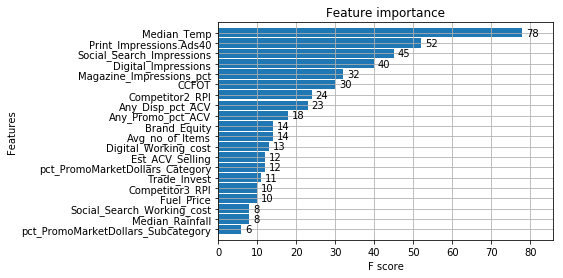

In [207]:
columns = list(train_df.columns)
columns.remove("EQ")
y_train = train_df["EQ"]
X_train = train_df[columns]
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train, verbose=True)
plot = plot_importance(reg, height=0.9, max_num_features=20)

In [208]:
columns = ["Median_Temp","Print_Impressions.Ads40","Social_Search_Impressions","Digital_Impressions","Magazine_Impressions_pct"]
y_train = train_df["EQ"]
X_train = train_df[columns]
X_test = test_df[columns]
y_test = test_df["EQ"]

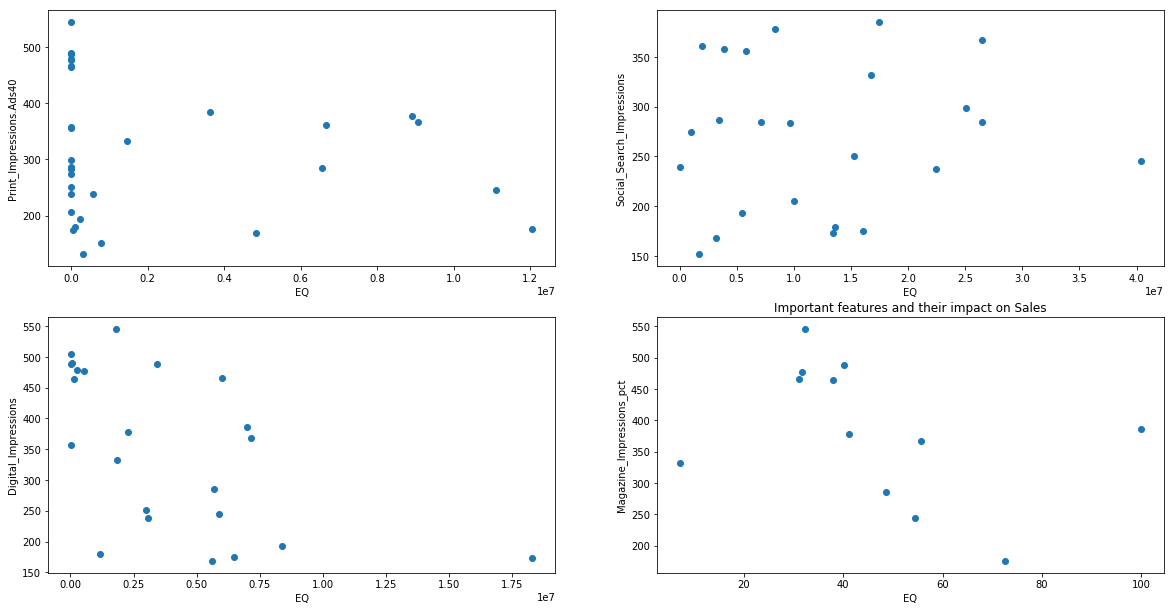

In [223]:
fig = plt.figure(figsize=(20,16))

for i in range(1,len(columns)):
    plt.subplot(3, 2, i)
    plt.scatter(X_train[columns[i]],y_train)
    plt.ylabel(columns[i])
    plt.xlabel("EQ") 
plt.title("Important features and their impact on Sales")
plt.show()


### XGB 

In [225]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints=None,
             n_estimators=2200, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=7, reg_alpha=0.464,
             reg_lambda=0.8571, scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method=None, validate_parameters=False, verbosity=None)

In [226]:
prediction_xgb = model_xgb.predict(X_test)
print("MAPE value using XGBoost Regressor",mean_absolute_percentage_error(y_test, prediction_xgb))

MAPE value using XGBoost Regressor 39.65772881964556


### LightGbm

In [227]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train,y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [228]:
prediction_lgb = model_lgb.predict(X_test)
print("MAPE value using Light Boost Regressor",mean_absolute_percentage_error(y_test, prediction_lgb))

MAPE value using Light Boost Regressor 37.242320854138306


### Catboost Regression

In [229]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(iterations=700,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='MAPE',
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 75,
                             od_wait=100)
cb_model.fit(X_train,y_train)

0:	learn: 0.3865291	total: 1.25ms	remaining: 875ms
75:	learn: 0.2389653	total: 54.2ms	remaining: 445ms
150:	learn: 0.1605357	total: 121ms	remaining: 441ms
225:	learn: 0.1067058	total: 237ms	remaining: 497ms
300:	learn: 0.0693707	total: 404ms	remaining: 536ms
375:	learn: 0.0467837	total: 609ms	remaining: 525ms
450:	learn: 0.0320585	total: 843ms	remaining: 465ms
525:	learn: 0.0222664	total: 1.12s	remaining: 372ms
600:	learn: 0.0152767	total: 1.36s	remaining: 224ms
675:	learn: 0.0104425	total: 1.61s	remaining: 57.3ms
699:	learn: 0.0092879	total: 1.69s	remaining: 0us


In [230]:
prediction_cb = cb_model.predict(X_test)
print("MAPE value using Cat Boost Regressor",mean_absolute_percentage_error(y_test, prediction_cb))

MAPE value using Cat Boost Regressor 29.309444999740226


### Ensemble method

In [217]:
predictions_final = (0.99995*prediction_cb+ 0.000045*prediction_lgb+0.000005*prediction_lgb)
print("MAPE value using Ensemble Prediciton",mean_absolute_percentage_error(y_test, predictions_final))

MAPE value using Ensemble Prediciton 18.673148457120583


## By choosing the majority drivers and predicting the values the, optimal MAPE values arrived is 18.67308182647568 for the newly given data set